<a href="https://colab.research.google.com/github/jblstorm/Beom/blob/main/%EC%8A%A4%ED%8F%AC%EC%B8%A0%EA%B4%80%EC%A4%91%EC%A0%84%EC%B2%B4%EC%9E%85%EC%9E%A5_%ED%99%95%EC%9D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
!pip install pytimekr
from pytimekr import pytimekr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
KBL=pd.read_excel('/content/drive/MyDrive/문화데이터경진대회/스포츠관중전체입장 현황/프로농구_2018~2022_전체관중현황.xlsx')
KLEAGUE=pd.read_excel('/content/drive/MyDrive/문화데이터경진대회/스포츠관중전체입장 현황/K리그1_2018-2022_전체관중현황.xlsx')
MAN_KOVO=pd.read_excel('/content/drive/MyDrive/문화데이터경진대회/스포츠관중전체입장 현황/남자프로배구_2018~2022_전체관중현황.xlsx')
WOMAN_KOVO=pd.read_excel('/content/drive/MyDrive/문화데이터경진대회/스포츠관중전체입장 현황/여자프로배구_2018~2022_전체관중현황.xlsx')
KBO=pd.read_excel('/content/drive/MyDrive/문화데이터경진대회/스포츠관중전체입장 현황/프로야구_2018-2022_전체관중현황.xlsx')
WKBL=pd.read_excel('/content/drive/MyDrive/문화데이터경진대회/스포츠관중전체입장 현황/여자프로농구_2018-2022_전체관중현황.xlsx')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: Future

In [69]:
print(KBL)
print(KLEAGUE)
print(MAN_KOVO)
print(WOMAN_KOVO)
print(KBO)
print(WKBL)

         SEASON       DATE  HOME AWAY STADIUM WEATHER TEMPERATURE  ATTENDANCE
0     2021-2022 2022-05-10    SK  KGC    잠실학생    구름많음       26.3℃        5308
1     2021-2022 2022-05-08   KGC   SK      안양       비         18℃        5200
2     2021-2022 2022-05-06   KGC   SK      안양    구름조금       24.9℃        4445
3     2021-2022 2022-05-04    SK  KGC    잠실학생      맑음       25.2℃        5303
4     2021-2022 2022-05-02    SK  KGC    잠실학생      맑음       19.4℃        5311
...         ...        ...   ...  ...     ...     ...         ...         ...
1077  2018-2019 2018-10-14  전자랜드   SK  인천삼산월드     NaN         NaN        5372
1078  2018-2019 2018-10-14    DB   삼성    원주종합     NaN         NaN        4075
1079  2018-2019 2018-10-13    SK   DB    잠실학생     NaN         NaN        5244
1080  2018-2019 2018-10-13   KCC   LG      군산     NaN         NaN        2585
1081  2018-2019 2018-10-13   모비스   KT      울산     NaN         NaN        4980

[1082 rows x 8 columns]
          DATE DAY hometeam awayteam ST

In [71]:
from datetime import datetime, timedelta
from pandas import DataFrame
KBO['DATE'] = pd.to_datetime(KBO['DATE'])
KBO['year'] = KBO['DATE'].dt.year
KBO['month'] = KBO['DATE'].dt.month
KBO['day'] = KBO['DATE'].dt.day
KBO['dayofweek'] = KBO['DATE'].dt.dayofweek
KBO.rename(columns={'HOME':'hometeam','AWAY':'awayteam'},inplace=True)
KBO['game'] = 1 #경기수 지정
KBO['is_weekend'] = ((KBO['DATE'].dt.dayofweek) // 5 == 1).astype(int) #몫이 1이면 주말, 0이면 평일
KBO[ 'occupancy' ] = KBO[ 'ATTENDANCE' ] / KBO[ 'attendance_capacity' ] #경기장별 관중점유율 변수 생성


KBO['TEMPERATURE'] = KBO['TEMPERATURE'].str.replace(pat=r'[℃]', repl= r' ',regex=True)  # replace multiple spaces with a single space(공란 없이)



KBO.replace('넥센','키움',inplace=True)
KBO.replace('SK','SSG',inplace=True)

KBO.replace('서울 잠실','잠실', inplace=True)
KBO.replace('인천 문학','문학', inplace=True)
KBO.replace('서울 고척돔','고척', inplace=True)
KBO.replace('부산 사직','사직', inplace=True)
print(KBO)

KBO.head()

           DATE DAY hometeam awayteam STADIUM WEATHER TEMPERATURE  ATTENDANCE  \
0    2022-07-06   수       한화       NC      대전      흐림       35.4         2726   
1    2022-07-06   수      KIA       KT      광주    구름많음       34.5         6269   
2    2022-07-06   수       삼성       LG     대구        비       33.8         4673   
3    2022-07-06   수      SSG       롯데      문학    구름많음       33.2         6859   
4    2022-07-06   수       두산       키움     잠실        비       33.3         2930   
...         ...  ..      ...      ...     ...     ...         ...         ...   
3034 2018-03-24   토       NC       LG      마산      맑음       19.4        11000   
3035 2018-03-24   토       두산       삼성     잠실     구름많음       13.1        25000   
3036 2018-03-24   토      SSG       롯데      문학      흐림        8.2        25000   
3037 2018-03-24   토      KIA       KT      광주    구름조금       17.8        20500   
3038 2018-03-24   토       키움       한화      고척    구름많음       13.1        15055   

      attendance_capacity  

,DATE,DAY,hometeam,awayteam,STADIUM,WEATHER,TEMPERATURE,ATTENDANCE,attendance_capacity,year,month,day,dayofweek,game,is_weekend,occupancy
0,2022-07-06,수,한화,NC,대전,흐림,35.4,2726,12000,2022,7,6,2,1,0,0.227167
1,2022-07-06,수,KIA,KT,광주,구름많음,34.5,6269,20500,2022,7,6,2,1,0,0.305805
2,2022-07-06,수,삼성,LG,대구,비,33.8,4673,24000,2022,7,6,2,1,0,0.194708
3,2022-07-06,수,SSG,롯데,문학,구름많음,33.2,6859,23000,2022,7,6,2,1,0,0.298217
4,2022-07-06,수,두산,키움,잠실,비,33.3,2930,25000,2022,7,6,2,1,0,0.117200


In [70]:
from pandas import DataFrame
KBL['DATE'] = pd.to_datetime(KBL['DATE'])
KBL['year'] = KBL['DATE'].dt.year
KBL['month'] = KBL['DATE'].dt.month
KBL['day'] = KBL['DATE'].dt.day
KBL['dayofweek'] = KBL['DATE'].dt.dayofweek
KBL['game'] = 1 
KBL['is_weekend'] = ((KBL['DATE'].dt.dayofweek) // 5 == 1).astype(int)#몫이 1이면 주말, 0이면 평일
KBL['game_time']=72 
KBL['TEMPERATURE'] = KBL['TEMPERATURE'].str.replace(pat=r'[℃]', repl= r' ',regex=True) 

KBL.rename(columns={'HOME':'hometeam','AWAY':'awayteam'},inplace=True)
KBL.head()

,SEASON,DATE,hometeam,awayteam,STADIUM,WEATHER,TEMPERATURE,ATTENDANCE,year,month,day,dayofweek,game,is_weekend,game_time
0,2021-2022,2022-05-10,SK,KGC,잠실학생,구름많음,26.3,5308,2022,5,10,1,1,0,72
1,2021-2022,2022-05-08,KGC,SK,안양,비,18,5200,2022,5,8,6,1,1,72
2,2021-2022,2022-05-06,KGC,SK,안양,구름조금,24.9,4445,2022,5,6,4,1,0,72
3,2021-2022,2022-05-04,SK,KGC,잠실학생,맑음,25.2,5303,2022,5,4,2,1,0,72
4,2021-2022,2022-05-02,SK,KGC,잠실학생,맑음,19.4,5311,2022,5,2,0,1,0,72


In [73]:
from datetime import datetime, timedelta
from pandas import DataFrame
KLEAGUE['DATE'] = pd.to_datetime(KLEAGUE['DATE'])
KLEAGUE['year'] = KLEAGUE['DATE'].dt.year
KLEAGUE['month'] = KLEAGUE['DATE'].dt.month
KLEAGUE['day'] = KLEAGUE['DATE'].dt.day
KLEAGUE['dayofweek'] = KLEAGUE['DATE'].dt.dayofweek
KLEAGUE['is_weekend'] = ((KLEAGUE['DATE'].dt.dayofweek) // 5 == 1).astype(int) #몫이 1이면 주말, 0이면 평일 #몫이 1이면 주말, 0이면 평일
KLEAGUE['game'] = 1
KLEAGUE["game_time"] = 90
KLEAGUE['ATTENDANCE'].astype(int) #정수형 변환
KLEAGUE[ 'occupancy' ] = KLEAGUE[ 'ATTENDANCE' ] /KLEAGUE[ 'attendance_capacity' ]


KLEAGUE['TEMPERATURE'] = KLEAGUE['TEMPERATURE'].str.replace(pat=r'[℃]', repl= r' ',regex=True)  # replace multiple spaces with a single space(공란 없이)




KLEAGUE.rename(columns={'HOME':'hometeam','AWAY':'awayteam'},inplace=True)
KLEAGUE.replace('수원 삼성','수원',inplace=True)
KLEAGUE.replace('수원 FC','수원F',inplace=True)
KLEAGUE.replace('상주 상무','상주',inplace=True)
KLEAGUE.replace('김천상무','김천',inplace=True)
KLEAGUE.replace('FC 서울','서울',inplace=True)
KLEAGUE.replace('인천 Utd','인천',inplace=True)
KLEAGUE.replace('전북 현대','전북',inplace=True)
KLEAGUE.replace('성남 FC','성남',inplace=True)
KLEAGUE.replace('포항 스틸러스','포항',inplace=True)
KLEAGUE.replace('전남 드래곤즈','전남',inplace=True)
KLEAGUE.replace('대구 FC','대구',inplace=True)
KLEAGUE.replace('강원 FC','강원',inplace=True)
KLEAGUE.replace('경남 FC','경남',inplace=True)
KLEAGUE.replace('울산 현대','울산',inplace=True)
KLEAGUE.replace('제주 Utd','제주',inplace=True)
KLEAGUE.replace('광주 FC','광주',inplace=True)
KLEAGUE.replace('부산 아이파크','부산',inplace=True)
KLEAGUE.replace('대전 하나 시티즌','대전',inplace=True)
KLEAGUE

,DATE,DAY,hometeam,awayteam,STADIUM,WEATHER,TEMPERATURE,ATTENDANCE,attendance_capacity,year,month,day,dayofweek,is_weekend,game,game_time,occupancy
0,2022-07-06,수,수원,대구,수원W,비,34.5,2231,43923,2022,7,6,2,0,1,90,0.050793
1,2022-07-06,수,서울,전북,서울W,비,33.3,8537,66704,2022,7,6,2,0,1,90,0.127983
2,2022-07-06,수,인천,수원F,인천전용,구름많음,33.2,3647,19200,2022,7,6,2,0,1,90,0.189948
3,2022-07-05,화,성남,포항,탄천,구름많음,32.8,804,16870,2022,7,5,1,0,1,90,0.047659
4,2022-07-05,화,김천,제주,김천,흐림,32.9,557,25000,2022,7,5,1,0,1,90,0.022280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,2018-03-03,토,강원,인천,춘천,맑음,0,4530,20000,2018,3,3,5,1,1,90,0.226500
967,2018-03-03,토,포항,대구,포항스틸야드,맑음,0,14584,15170,2018,3,3,5,1,1,90,0.961371
968,2018-03-01,목,제주,서울,제주W,맑음,0,4979,29790,2018,3,1,3,0,1,90,0.167137
969,2018-03-01,목,수원,전남,수원W,맑음,0,8456,43923,2018,3,1,3,0,1,90,0.192519


In [74]:
from datetime import datetime, timedelta
from pandas import DataFrame
MAN_KOVO['DATE'] = pd.to_datetime(MAN_KOVO['DATE'])
MAN_KOVO['year'] = MAN_KOVO['DATE'].dt.year
MAN_KOVO['month'] = MAN_KOVO['DATE'].dt.month
MAN_KOVO['day'] = MAN_KOVO['DATE'].dt.day
MAN_KOVO['dayofweek'] = MAN_KOVO['DATE'].dt.dayofweek
MAN_KOVO.rename(columns={'HOME':'hometeam','AWAY':'awayteam'},inplace=True)
MAN_KOVO['is_weekend'] = ((MAN_KOVO['DATE'].dt.dayofweek) // 5 == 1).astype(int) #몫이 1이면 주말, 0이면 평일
MAN_KOVO['TEMPERATURE'] = MAN_KOVO['TEMPERATURE'].str.replace(pat=r'[℃]', repl= r' ',regex=True)  # replace multiple spaces with a single space(공란 없이)
MAN_KOVO['TEMPERATURE'].fillna('15')
MAN_KOVO['WEATHER'].fillna('맑음')
MAN_KOVO['game'] = 1 

MAN_KOVO.head()

,SEASON,DATE,hometeam,awayteam,STADIUM,WEATHER,TEMPERATURE,ATTENDANCE,year,month,day,dayofweek,is_weekend,game
0,2021-2022,2022-03-30,KB손해보험,한국전력,의정부,NaN,NaN,599,2022,3,30,2,0,1
1,2021-2022,2022-03-29,대한항공,삼성화재,인천계양,NaN,NaN,605,2022,3,29,1,0,1
2,2021-2022,2022-03-28,OK금융그룹,현대캐피탈,안산상록수,NaN,NaN,474,2022,3,28,0,0,1
3,2021-2022,2022-03-27,한국전력,우리카드,수원,NaN,NaN,1011,2022,3,27,6,1,1
4,2021-2022,2022-03-26,KB손해보험,삼성화재,의정부,NaN,NaN,1015,2022,3,26,5,1,1


In [75]:
from datetime import datetime, timedelta
from pandas import DataFrame
WOMAN_KOVO['DATE'] = pd.to_datetime(WOMAN_KOVO['DATE'])
WOMAN_KOVO['year'] = WOMAN_KOVO['DATE'].dt.year
WOMAN_KOVO['month'] = WOMAN_KOVO['DATE'].dt.month
WOMAN_KOVO['day'] =WOMAN_KOVO['DATE'].dt.day
WOMAN_KOVO['dayofweek'] = WOMAN_KOVO['DATE'].dt.dayofweek
WOMAN_KOVO['is_weekend'] = ((WOMAN_KOVO['DATE'].dt.dayofweek) // 5 == 1).astype(int) #몫이 1이면 주말, 0이면 평일
WOMAN_KOVO['TEMPERATURE'].fillna('15')
WOMAN_KOVO['TEMPERATURE'] = WOMAN_KOVO['TEMPERATURE'].str.replace(pat=r'[℃]', repl= r' ',regex=True) 
WOMAN_KOVO['WEATHER'].fillna('맑음')
WOMAN_KOVO['game'] = 1 



WOMAN_KOVO.rename(columns={'HOME':'hometeam','AWAY':'awayteam'},inplace=True)
WOMAN_KOVO.head()

,SEASON,DATE,hometeam,awayteam,STADIUM,WEATHER,TEMPERATURE,ATTENDANCE,year,month,day,dayofweek,is_weekend,game
0,2021~2022,2022-03-21,흥국생명,GS칼텍스,인천삼산월드,구름많음,8.3,489,2022,3,21,0,0,1
1,2021~2022,2022-03-20,IBK기업은행,KGC인삼공사,화성종합실내,구름많음,8.6,1576,2022,3,20,6,1,1
2,2021~2022,2022-03-05,한국도로공사,흥국생명,김천실내,맑음,10.3,805,2022,3,5,5,1,1
3,2021~2022,2022-03-03,KGC인삼공사,페퍼저축은행,대전충무,맑음,14.6,437,2022,3,3,3,0,1
4,2021~2022,2022-03-02,흥국생명,IBK기업은행,인천계양,맑음,6.4,784,2022,3,2,2,0,1


In [76]:
WKBL['DATE'] = pd.to_datetime(WKBL['DATE'])
WKBL['year'] = WKBL['DATE'].dt.year
WKBL['month'] = WKBL['DATE'].dt.month
WKBL['day'] =WKBL['DATE'].dt.day
WKBL['dayofweek'] = WKBL['DATE'].dt.dayofweek
WKBL['is_weekend'] = ((WKBL['DATE'].dt.dayofweek) // 5 == 1).astype(int)
 #몫이 1이면 주말, 0이면 평일

WKBL['TEMPERATURE'] = WOMAN_KOVO['TEMPERATURE'].str.replace(pat=r'[℃]', repl= r' ',regex=True) 
WKBL['WEATHER'].fillna('맑음')

WKBL['game'] = 1 

WKBL.rename(columns={'HOME':'hometeam','AWAY':'awayteam'},inplace=True)
WKBL.head()


,SEASON,DATE,hometeam,awayteam,STADIUM,WEATHER,TEMPERATURE,ATTENDANCE,year,month,day,dayofweek,is_weekend,game
0,2021-2022,2022-04-14,우리은행,KB스타즈,아산이순신체육관,NaN,8.3,1383,2022.0,4.0,14.0,3.0,0,1
1,2021-2022,2022-04-12,KB스타즈,우리은행,청주체육관,NaN,8.6,1610,2022.0,4.0,12.0,1.0,0,1
2,2021-2022,2022-04-12,KB스타즈,우리은행,청주체육관,NaN,10.3,2145,2022.0,4.0,12.0,1.0,0,1
3,2021-2022,2022-04-10,신한은행,우리은행,인천도원체육관,NaN,14.6,557,2022.0,4.0,10.0,6.0,1,1
4,2021-2022,2022-04-07,우리은행,신한은행,아산이순신체육관,구름많음,6.4,760,2022.0,4.0,7.0,3.0,0,1


In [77]:
WKBL.info()
KLEAGUE.info()
KBO.info()
KBL.info()
MAN_KOVO.info()
WOMAN_KOVO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   SEASON       374 non-null    object        
 1   DATE         373 non-null    datetime64[ns]
 2   hometeam     374 non-null    object        
 3   awayteam     374 non-null    object        
 4   STADIUM      374 non-null    object        
 5   WEATHER      364 non-null    object        
 6   TEMPERATURE  371 non-null    object        
 7   ATTENDANCE   374 non-null    int64         
 8   year         373 non-null    float64       
 9   month        373 non-null    float64       
 10  day          373 non-null    float64       
 11  dayofweek    373 non-null    float64       
 12  is_weekend   374 non-null    int64         
 13  game         374 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(6)
memory usage: 41.0+ KB
<class 'pandas.core.frame.Dat

In [78]:
# 결측치 확인 및 제거
KLEAGUE.isnull()

,DATE,DAY,hometeam,awayteam,STADIUM,WEATHER,TEMPERATURE,ATTENDANCE,attendance_capacity,year,month,day,dayofweek,is_weekend,game,game_time,occupancy
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
967,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
968,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
969,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [72]:
KBO['DAY'].unique
KBO['DAY'].count

<bound method Series.count of 0       수
1       수
2       수
3       수
4       수
       ..
3034    토
3035    토
3036    토
3037    토
3038    토
Name: DAY, Length: 3039, dtype: object>

In [79]:

KBO.isnull().sum()
KBO['TEMPERATURE'].fillna('15')
KBO['WEATHER'].fillna('맑음')
KBO['hometeam'].replace('SK','SSG',inplace=True)
KBO['awayteam'].replace('SK','SSG',inplace=True)

In [80]:
KBO.iloc[:, :15]

,DATE,DAY,hometeam,awayteam,STADIUM,WEATHER,TEMPERATURE,ATTENDANCE,attendance_capacity,year,month,day,dayofweek,game,is_weekend
0,2022-07-06,수,한화,NC,대전,흐림,35.4,2726,12000,2022,7,6,2,1,0
1,2022-07-06,수,KIA,KT,광주,구름많음,34.5,6269,20500,2022,7,6,2,1,0
2,2022-07-06,수,삼성,LG,대구,비,33.8,4673,24000,2022,7,6,2,1,0
3,2022-07-06,수,SSG,롯데,문학,구름많음,33.2,6859,23000,2022,7,6,2,1,0
4,2022-07-06,수,두산,키움,잠실,비,33.3,2930,25000,2022,7,6,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3034,2018-03-24,토,NC,LG,마산,맑음,19.4,11000,11000,2018,3,24,5,1,1
3035,2018-03-24,토,두산,삼성,잠실,구름많음,13.1,25000,25000,2018,3,24,5,1,1
3036,2018-03-24,토,SSG,롯데,문학,흐림,8.2,25000,23000,2018,3,24,5,1,1
3037,2018-03-24,토,KIA,KT,광주,구름조금,17.8,20500,20500,2018,3,24,5,1,1


In [81]:
KBL.isnull().sum()
KBL['TEMPERATURE'].dropna()
KBL['TEMPERATURE'].fillna('15')
KBL['WEATHER'].fillna('구름 조금')

0        구름많음
1           비
2        구름조금
3          맑음
4          맑음
        ...  
1077    구름 조금
1078    구름 조금
1079    구름 조금
1080    구름 조금
1081    구름 조금
Name: WEATHER, Length: 1082, dtype: object

In [82]:
KBL.dropna()

,SEASON,DATE,hometeam,awayteam,STADIUM,WEATHER,TEMPERATURE,ATTENDANCE,year,month,day,dayofweek,game,is_weekend,game_time
0,2021-2022,2022-05-10,SK,KGC,잠실학생,구름많음,26.3,5308,2022,5,10,1,1,0,72
1,2021-2022,2022-05-08,KGC,SK,안양,비,18,5200,2022,5,8,6,1,1,72
2,2021-2022,2022-05-06,KGC,SK,안양,구름조금,24.9,4445,2022,5,6,4,1,0,72
3,2021-2022,2022-05-04,SK,KGC,잠실학생,맑음,25.2,5303,2022,5,4,2,1,0,72
4,2021-2022,2022-05-02,SK,KGC,잠실학생,맑음,19.4,5311,2022,5,2,0,1,0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,2020-2021,2020-10-10,전자랜드,SK,인천삼산월드,구름조금,20,0,2020,10,10,5,1,1,72
574,2020-2021,2020-10-10,삼성,KGC,잠실실내,구름조금,21.5,0,2020,10,10,5,1,1,72
575,2020-2021,2020-10-09,KGC,전자랜드,안양,맑음,23.5,0,2020,10,9,4,1,0,72
576,2020-2021,2020-10-09,DB,삼성,원주종합,구름조금,20.9,0,2020,10,9,4,1,0,72


In [83]:
#연도별 관중 합계
#프로축구 연도별 관중
KLEAGUE.groupby('year')['ATTENDANCE'].sum()

year
2018    1257869
2019    1840707
2020      86640
2021     454798
2022     529465
Name: ATTENDANCE, dtype: int64

In [84]:

#프로야구 연도별 관중
KBO.groupby('year')['ATTENDANCE'].sum()

year
2018    8073742
2019    7286008
2020     328317
2021    1085202
2022    3266749
Name: ATTENDANCE, dtype: int64

In [85]:
#프로농구 시즌별 관중
KBL.groupby('SEASON')['ATTENDANCE'].sum()

SEASON
2018-2019    868567
2019-2020    643651
2020-2021    110235
2021-2022    335910
Name: ATTENDANCE, dtype: int64

In [86]:
#여자프로농구 시즌별 관중
WKBL.groupby('SEASON')['ATTENDANCE'].sum()

SEASON
2018~2019    109222
2019~2020     85133
2020~2021         0
2021-2022     43636
Name: ATTENDANCE, dtype: int64

In [87]:

#남자프로배구 시즌별 관중
MAN_KOVO.groupby('SEASON')['ATTENDANCE'].sum()

SEASON
2018-2019    307401
2019-2020    219460
2020-2021     10032
2021-2022     71676
Name: ATTENDANCE, dtype: int64

In [88]:
#여자프로배구 시즌별 관중
WOMAN_KOVO.groupby('SEASON')['ATTENDANCE'].sum()

SEASON
2018~2019    226498
2019~2020    173599
2020~2021     14197
2021~2022    123982
Name: ATTENDANCE, dtype: int64

In [89]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


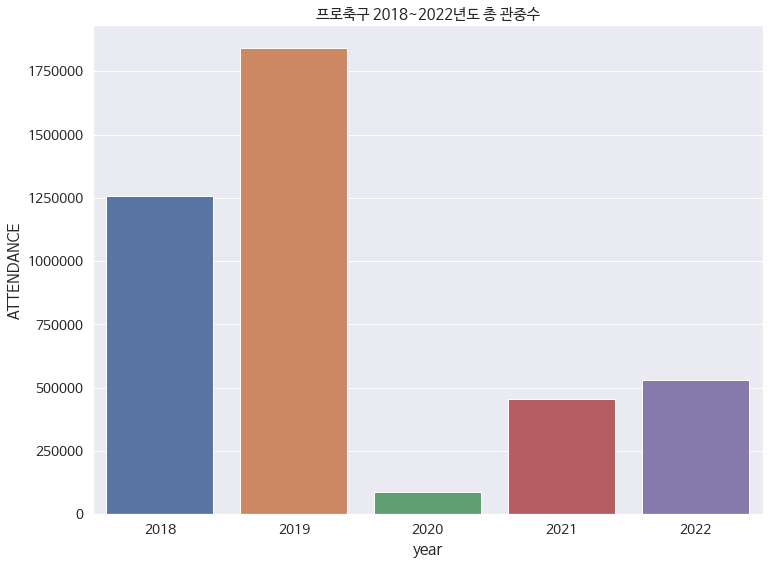

In [90]:
# 연도별 관중수 시각화

plt.rc('font', family='NanumBarunGothic') 

plt.figure(figsize=(12, 9))
plt.title('프로축구 2018~2022년도 총 관중수',fontsize=15)
x = KLEAGUE.groupby('year')['ATTENDANCE'].sum().keys()
y = KLEAGUE.groupby('year')['ATTENDANCE'].sum()
plt.ticklabel_format(style='plain')
sns.barplot(x, y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


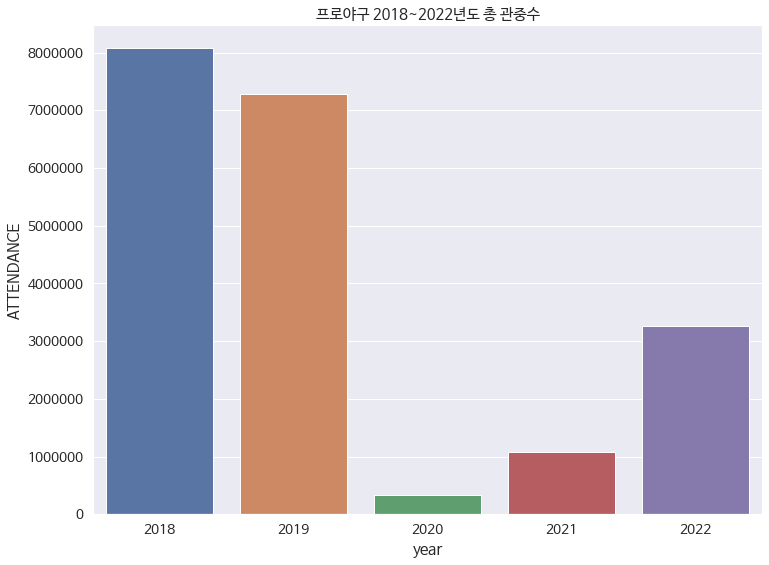

In [91]:
plt.figure(figsize=(12, 9))
plt.title('프로야구 2018~2022년도 총 관중수',fontsize=15)
x = KBO.groupby('year')['ATTENDANCE'].sum().keys()
y = KBO.groupby('year')['ATTENDANCE'].sum()
plt.ticklabel_format(style='plain')
sns.barplot(x, y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


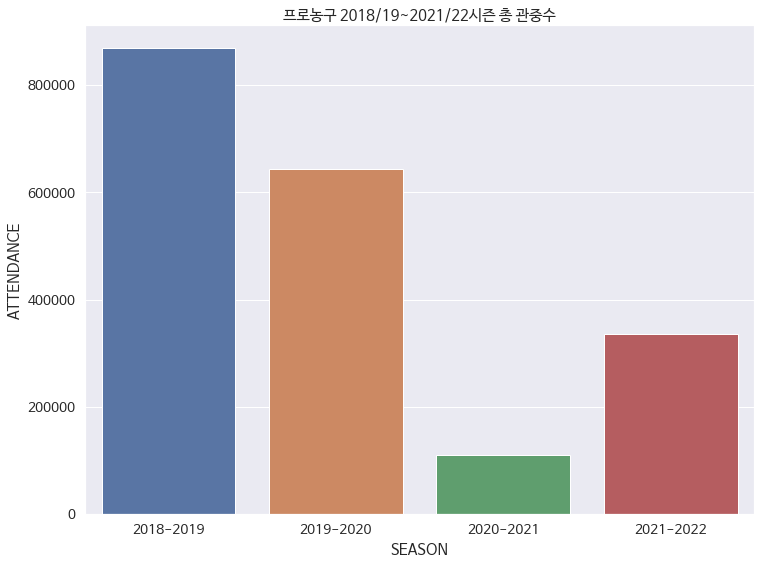

In [92]:
plt.figure(figsize=(12, 9))
plt.title('프로농구 2018/19~2021/22시즌 총 관중수',fontsize=15)
x = KBL.groupby('SEASON')['ATTENDANCE'].sum().keys()
y = KBL.groupby('SEASON')['ATTENDANCE'].sum()
plt.ticklabel_format(style='plain')
sns.barplot(x, y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


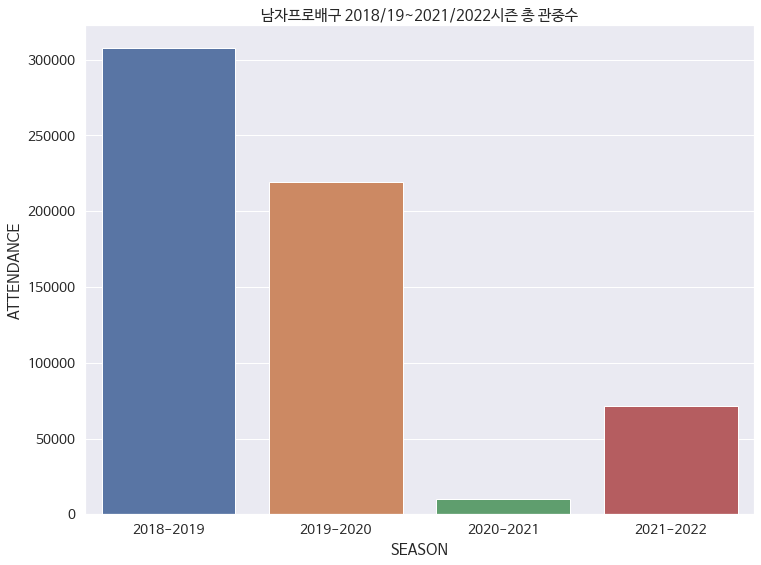

In [93]:
plt.figure(figsize=(12, 9))
plt.title('남자프로배구 2018/19~2021/2022시즌 총 관중수',fontsize=15)
x = MAN_KOVO.groupby('SEASON')['ATTENDANCE'].sum().keys()
y = MAN_KOVO.groupby('SEASON')['ATTENDANCE'].sum()
plt.ticklabel_format(style='plain')
sns.barplot(x, y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


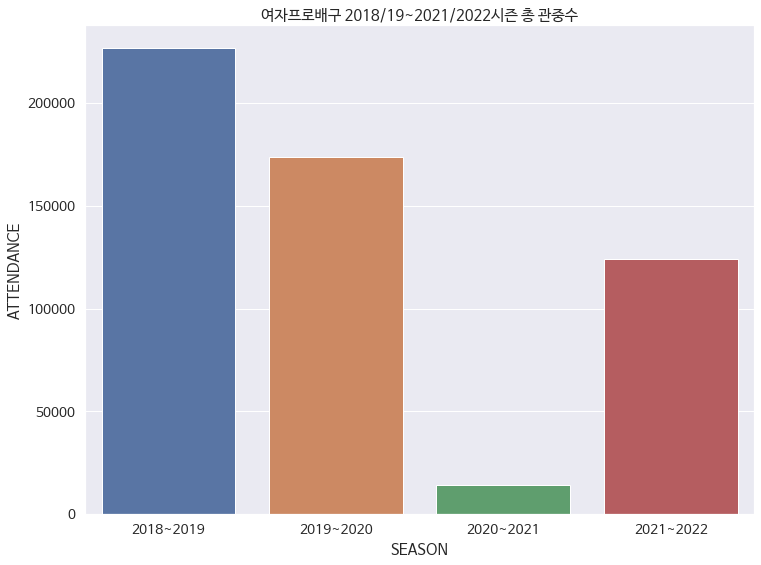

In [94]:

plt.figure(figsize=(12, 9))
plt.title('여자프로배구 2018/19~2021/2022시즌 총 관중수',fontsize=15)
x = WOMAN_KOVO.groupby('SEASON')['ATTENDANCE'].sum().keys()
y = WOMAN_KOVO.groupby('SEASON')['ATTENDANCE'].sum()
plt.ticklabel_format(style='plain')
sns.barplot(x, y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


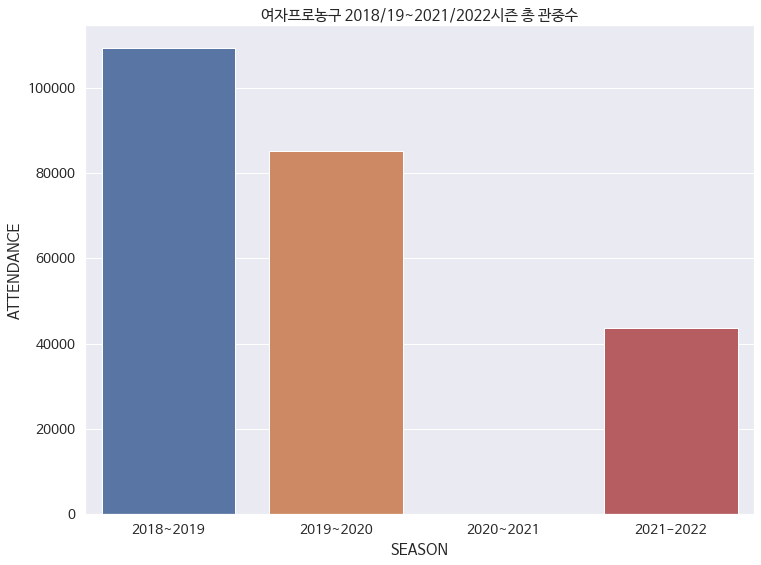

In [95]:

plt.figure(figsize=(12, 9))
plt.title('여자프로농구 2018/19~2021/2022시즌 총 관중수',fontsize=15)
x = WKBL.groupby('SEASON')['ATTENDANCE'].sum().keys()
y = WKBL.groupby('SEASON')['ATTENDANCE'].sum()

plt.ticklabel_format(style='plain')
sns.barplot(x, y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


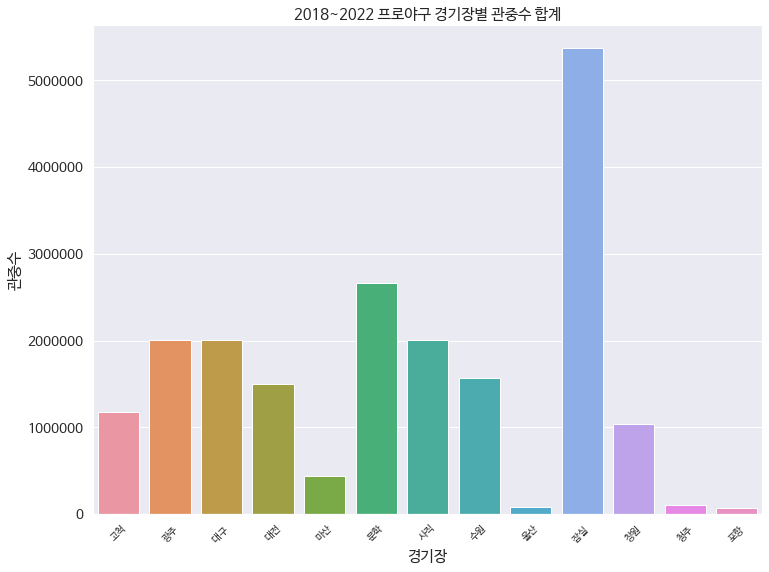

In [96]:
### 경기장별 관중 입장 총합 확인

plt.rc('font', family='NanumBarunGothic') 
x = KBO.groupby('STADIUM')['ATTENDANCE'].sum().keys()
y = KBO.groupby('STADIUM')['ATTENDANCE'].sum()
plt.title('2018~2022 프로야구 경기장별 관중수 합계')
plt.xticks(rotation=45,fontsize=10)

plt.ticklabel_format(style='plain')
sns.barplot(x, y)
plt.xlabel('경기장')
plt.ylabel('관중수')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


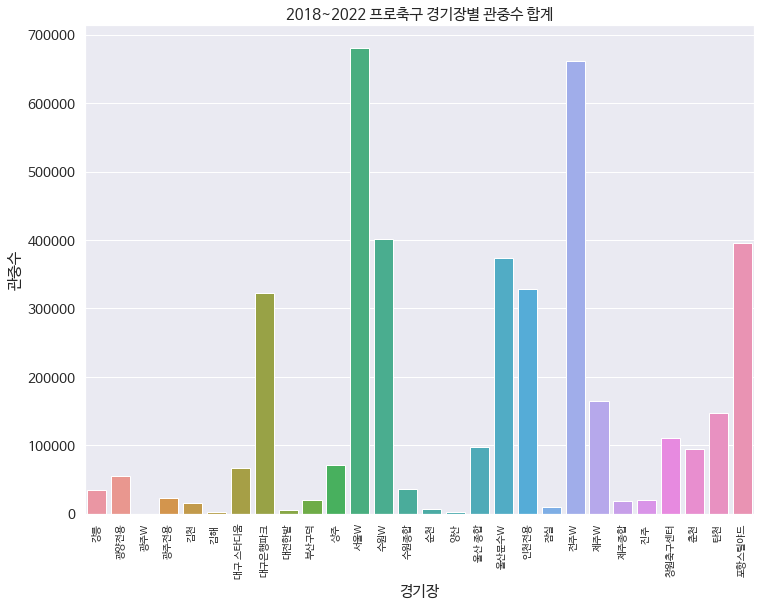

In [97]:
x = KLEAGUE.groupby('STADIUM')['ATTENDANCE'].sum().keys()
y = KLEAGUE.groupby('STADIUM')['ATTENDANCE'].sum()
plt.title('2018~2022 프로축구 경기장별 관중수 합계')
plt.ticklabel_format(style='plain')
plt.xticks(rotation=90,fontsize=10)
sns.barplot(x, y)
plt.xlabel('경기장')
plt.ylabel('관중수')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


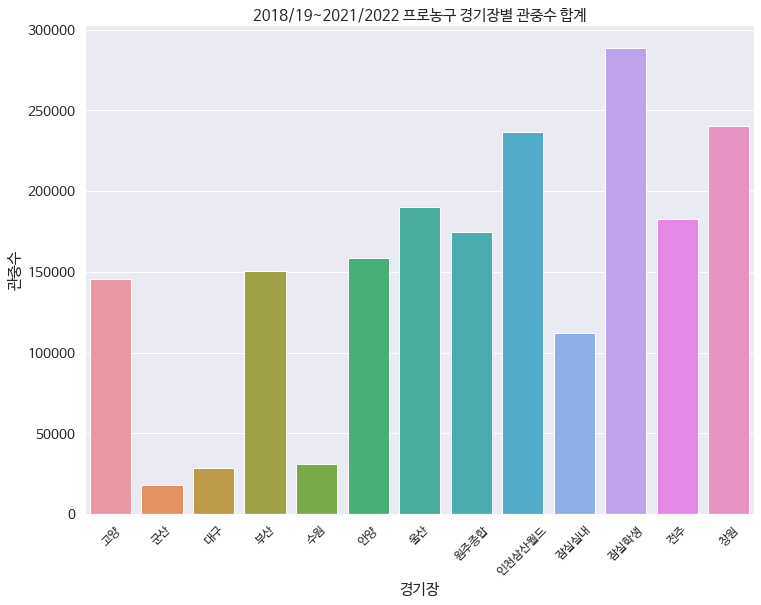

In [98]:
x = KBL.groupby('STADIUM')['ATTENDANCE'].sum().keys()
y = KBL.groupby('STADIUM')['ATTENDANCE'].sum()
plt.title('2018/19~2021/2022 프로농구 경기장별 관중수 합계')
plt.xticks(rotation=45,fontsize=12)
plt.ticklabel_format(style='plain')
sns.barplot(x, y)
plt.xlabel('경기장')
plt.ylabel('관중수')
plt.show()

## 대구의 경우 2021-22시즌부터 집계

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


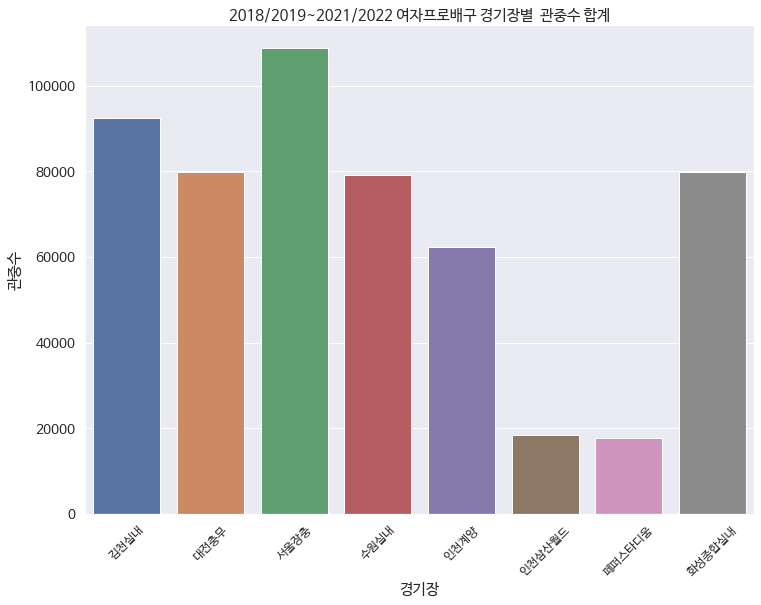

In [99]:
x = WOMAN_KOVO.groupby('STADIUM')['ATTENDANCE'].sum().keys()
y = WOMAN_KOVO.groupby('STADIUM')['ATTENDANCE'].sum()
plt.title('2018/2019~2021/2022 여자프로배구 경기장별  관중수 합계')
plt.xticks(rotation=45,fontsize=12)
plt.ticklabel_format(style='plain')
sns.barplot(x, y)
plt.xlabel('경기장')
plt.ylabel('관중수')
plt.show()

#광주의 경우 2021,2022년 집계

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


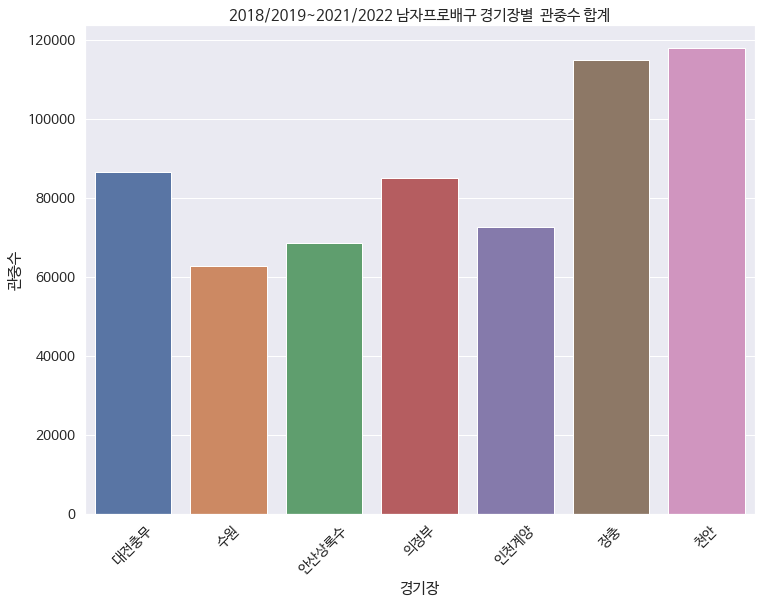

In [100]:
x = MAN_KOVO.groupby('STADIUM')['ATTENDANCE'].sum().keys()
y = MAN_KOVO.groupby('STADIUM')['ATTENDANCE'].sum()
plt.title('2018/2019~2021/2022 남자프로배구 경기장별  관중수 합계')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain')
sns.barplot(x, y)
plt.xlabel('경기장')
plt.ylabel('관중수')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


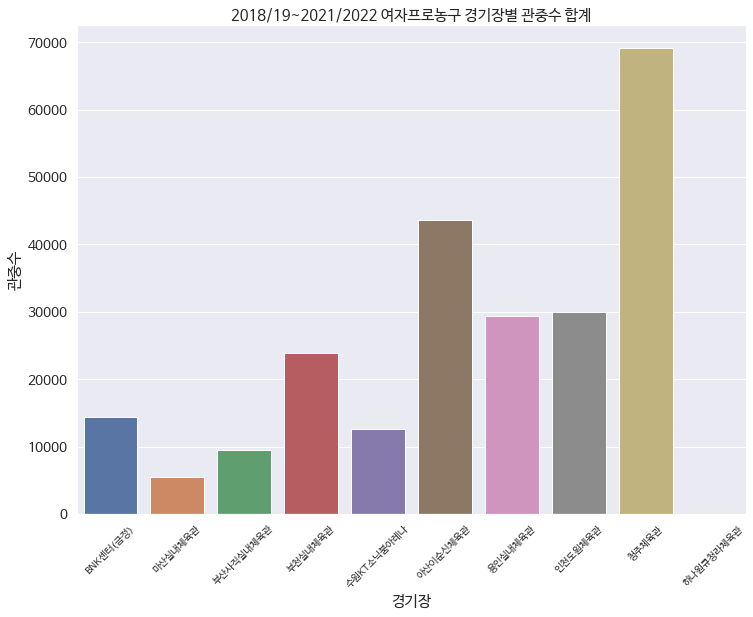

In [101]:

x = WKBL.groupby('STADIUM')['ATTENDANCE'].sum().keys()
y = WKBL.groupby('STADIUM')['ATTENDANCE'].sum()
plt.title('2018/19~2021/2022 여자프로농구 경기장별 관중수 합계')
plt.xticks(rotation=45,fontsize=10)
plt.ticklabel_format(style='plain')
sns.barplot(x, y)
plt.xlabel('경기장')
plt.ylabel('관중수')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


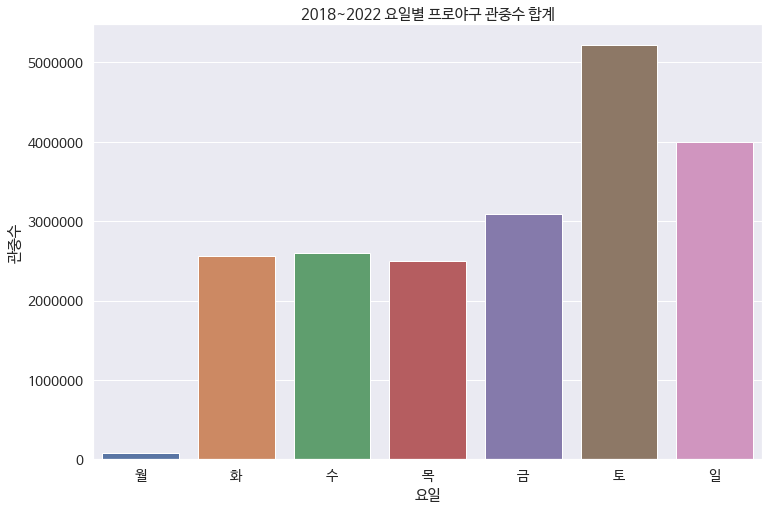

In [102]:
x = KBO.groupby('dayofweek')['ATTENDANCE'].sum().keys()
y = KBO.groupby('dayofweek')['ATTENDANCE'].sum()
plt.figure(figsize=(12, 8))
xlabel = ['월', '화', '수', '목', '금', '토', '일']



plt.title('2018~2022 요일별 프로야구 관중수 합계')
plt.ticklabel_format(style='plain')
ax = sns.barplot(x, y)
ax.set(xticklabels=xlabel)

plt.xlabel('요일')
plt.ylabel('관중수')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


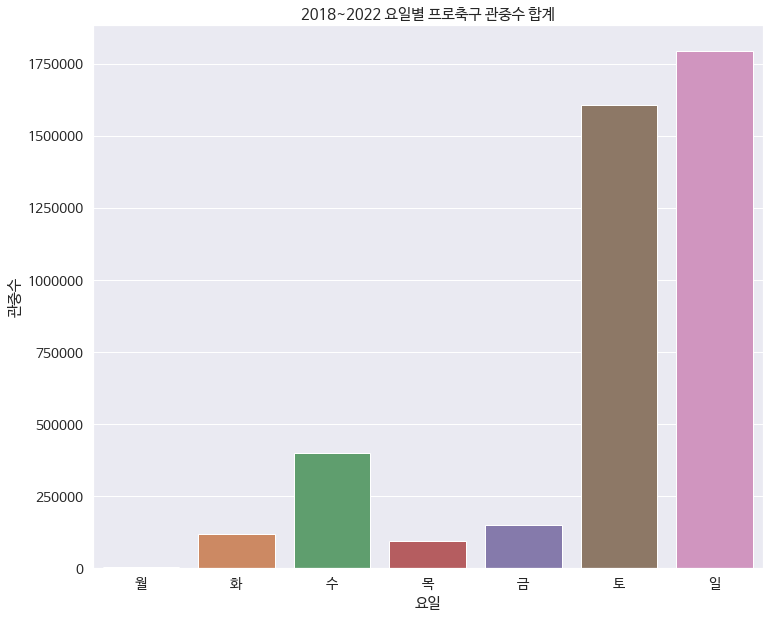

In [103]:
xlabel = ['월', '화', '수', '목', '금', '토', '일']
plt.figure(figsize=(12, 10))
x = KLEAGUE.groupby('dayofweek')['ATTENDANCE'].sum().keys()
y = KLEAGUE.groupby('dayofweek')['ATTENDANCE'].sum()



plt.title('2018~2022 요일별 프로축구 관중수 합계')
plt.ticklabel_format(style='plain')
ax = sns.barplot(x, y)
ax.set(xticklabels=xlabel)


plt.xlabel('요일')
plt.ylabel('관중수')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


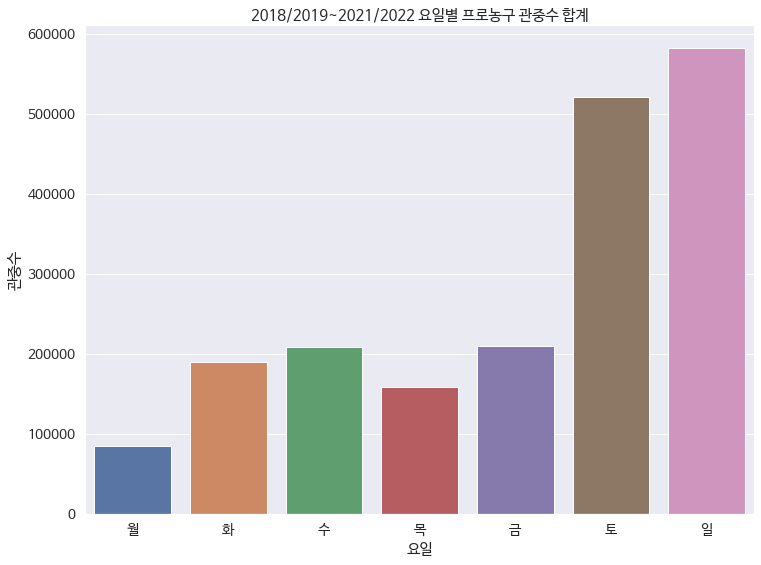

In [104]:
xlabel = ['월', '화', '수', '목', '금', '토', '일']
plt.figure(figsize=(12, 9))

x = KBL.groupby('dayofweek')['ATTENDANCE'].sum().keys()
y = KBL.groupby('dayofweek')['ATTENDANCE'].sum()

plt.title('2018/2019~2021/2022 요일별 프로농구 관중수 합계')
plt.ticklabel_format(style='plain')
ax=sns.barplot(x, y)
ax.set(xticklabels=xlabel)

plt.xlabel('요일')
plt.ylabel('관중수')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


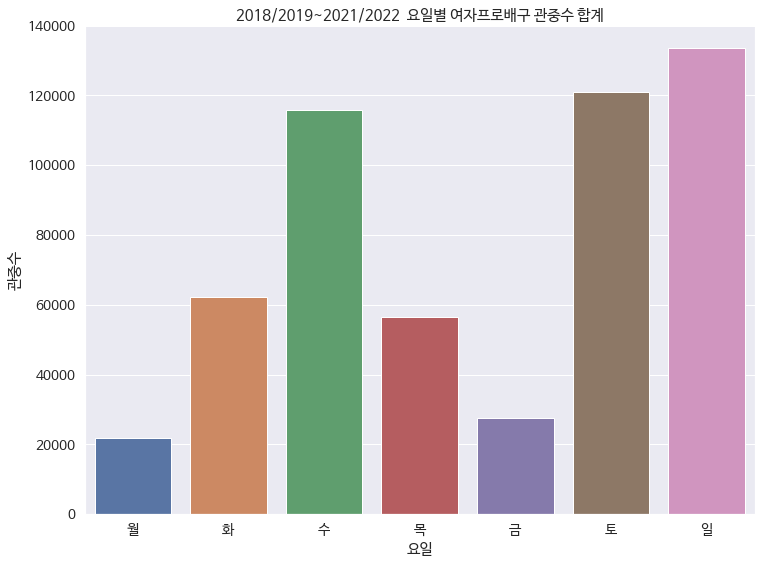

In [105]:
xlabel = ['월', '화', '수', '목', '금', '토', '일']
plt.figure(figsize=(12, 9))
x = WOMAN_KOVO.groupby('dayofweek')['ATTENDANCE'].sum().keys()
y = WOMAN_KOVO.groupby('dayofweek')['ATTENDANCE'].sum()


plt.title('2018/2019~2021/2022  요일별 여자프로배구 관중수 합계')
plt.ticklabel_format(style='plain')
ax=sns.barplot(x, y)
ax.set(xticklabels=xlabel)

plt.xlabel('요일')
plt.ylabel('관중수')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


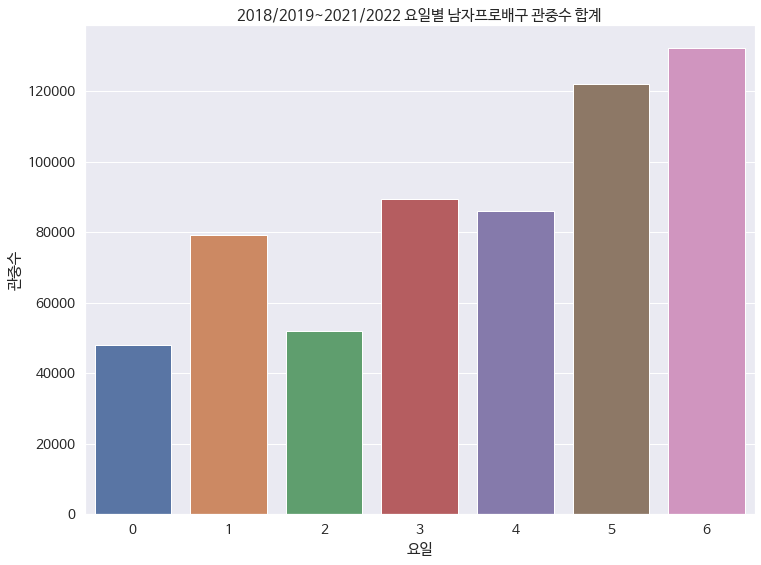

In [106]:
xlabel = ['월', '화', '수', '목', '금', '토', '일']
plt.figure(figsize=(12, 9))
x = MAN_KOVO.groupby('dayofweek')['ATTENDANCE'].sum().keys()
y = MAN_KOVO.groupby('dayofweek')['ATTENDANCE'].sum()

plt.title('2018/2019~2021/2022 요일별 남자프로배구 관중수 합계')
plt.ticklabel_format(style='plain')
ax=sns.barplot(x, y)
ax.set(xticklabels=xlabel)

sns.barplot(x, y)
plt.xlabel('요일')
plt.ylabel('관중수')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


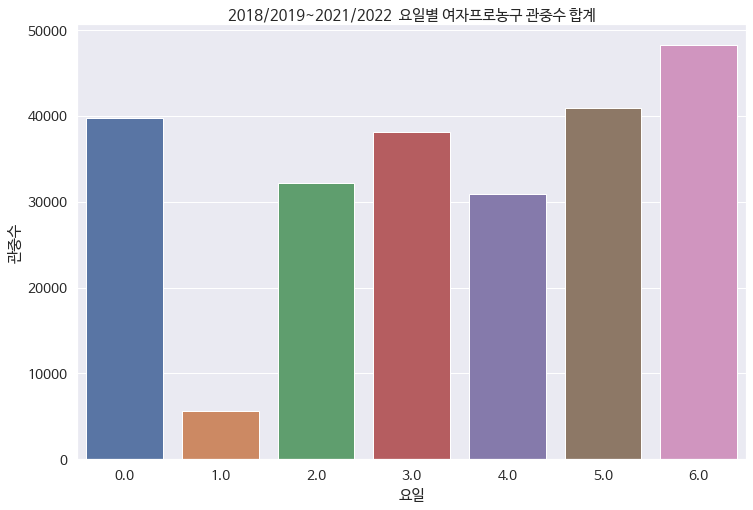

In [107]:
xlabel = ['월', '화', '수', '목', '금', '토', '일']
plt.figure(figsize=(12, 8))
x = WKBL.groupby('dayofweek')['ATTENDANCE'].sum().keys()
y = WKBL.groupby('dayofweek')['ATTENDANCE'].sum()


plt.title('2018/2019~2021/2022  요일별 여자프로농구 관중수 합계')
plt.ticklabel_format(style='plain')
ax=sns.barplot(x, y)
ax.set(xticklabels=xlabel)

sns.barplot(x, y)

plt.xlabel('요일')
plt.ylabel('관중수')
plt.show()

**히트맵을 통한 평일/주말 관중입장 분포 확인**

In [108]:
#피봇테이블 생성
## 요일별 관중 입장 분포(프로축구)
football_pivot_day=pd.pivot_table(KLEAGUE, index=['is_weekend'],columns='year',values='ATTENDANCE',aggfunc="sum",fill_value=0)

football_pivot_day

year,2018,2019,2020,2021,2022
is_weekend,,,,,
0,224583,290094,5785,100475,143841
1,1033286,1550613,80855,354323,385624


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

Text(80.5, 0.5, 'weekday/weekend')

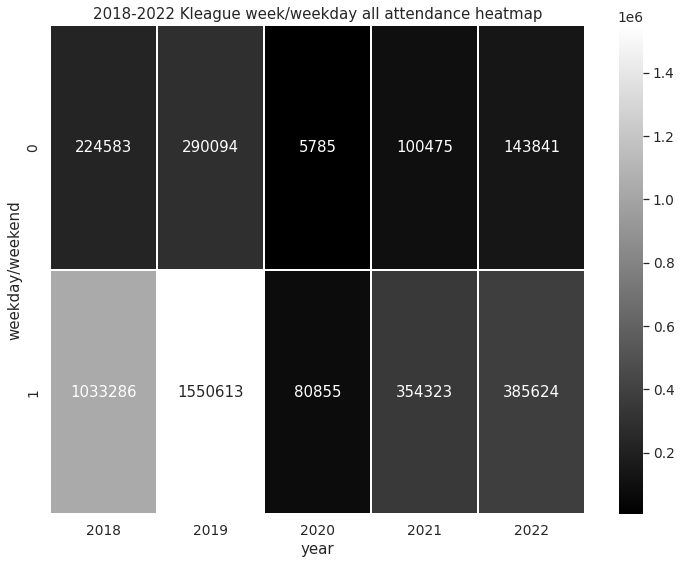

In [109]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')
plt.rcParams["figure.figsize"]=(12,9)

sns.set(font_scale=1.25)
sns.heatmap(data=football_pivot_day,cmap="gist_gray", annot=True, fmt="d", linewidths=1)
plt.title("2018-2022 Kleague week/weekday all attendance heatmap")

plt.xlabel('year')
plt.ylabel('weekday/weekend')

In [110]:

#프로야구
baseball_pivot_day=pd.pivot_table(KBO,index=['is_weekend'],columns='year',values='ATTENDANCE',aggfunc="sum",fill_value=0)

baseball_pivot_day

year,2018,2019,2020,2021,2022
is_weekend,,,,,
0,4574147,3854052,208025,567870,1619238
1,3499595,3431956,120292,517332,1647511


Text(80.5, 0.5, 'weekday/weekend')

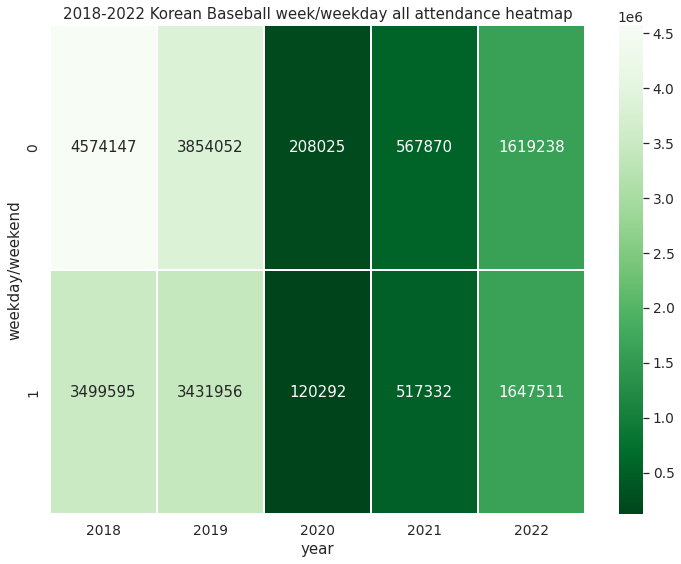

In [111]:
plt.rc('font', family='NanumBarunGothic')
plt.rcParams["figure.figsize"]=(12,9)
sns.set(font_scale=1.25)
sns.heatmap(data=baseball_pivot_day,cmap="Greens_r", annot=True,fmt="d", linewidths=1)
plt.title("2018-2022 Korean Baseball week/weekday all attendance heatmap")


plt.xlabel('year',fontsize=15)
plt.ylabel('weekday/weekend',fontsize=15)

In [112]:
#프로농구
basketball_pivot_day=pd.pivot_table(KBL,index=['is_weekend'],columns='SEASON',values='ATTENDANCE',aggfunc="sum",fill_value=0)

basketball_pivot_day

SEASON,2018-2019,2019-2020,2020-2021,2021-2022
is_weekend,,,,
0,429536,238068,46025,141508
1,439031,405583,64210,194402


Text(80.5, 0.5, 'weekday/weekend')

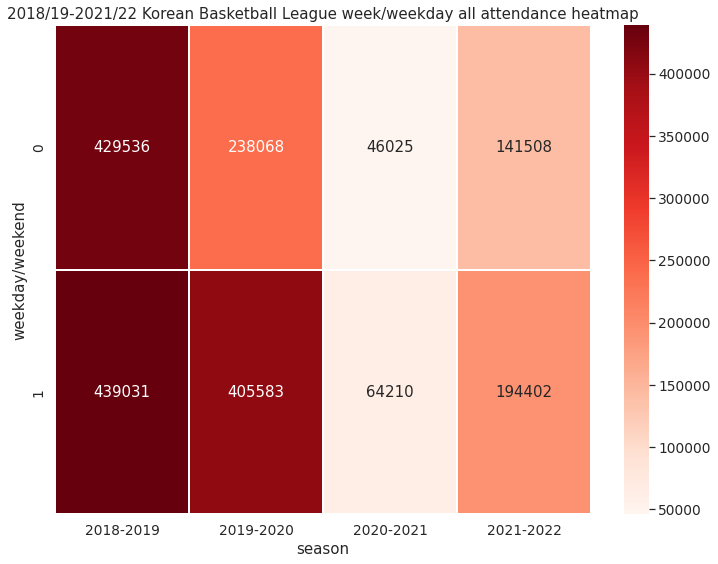

In [113]:
plt.rc('font', family='NanumBarunGothic')
plt.rcParams["figure.figsize"]=(12,9)
sns.set(font_scale=1.25)
sns.heatmap(data=basketball_pivot_day,cmap="Reds", annot=True, fmt="d", linewidths=1)
plt.title("2018/19-2021/22 Korean Basketball League week/weekday all attendance heatmap")

plt.xlabel('season')
plt.ylabel('weekday/weekend')

In [114]:
#여자프로배구
Womankovo_pivot_day=pd.pivot_table(WOMAN_KOVO,index=['is_weekend'],columns='SEASON',values='ATTENDANCE',aggfunc="sum",fill_value=0)
Womankovo_pivot_day

SEASON,2018~2019,2019~2020,2020~2021,2021~2022
is_weekend,,,,
0,111823,90715,6628,74676
1,114675,82884,7569,49306


Text(80.5, 0.5, 'weekday/weekend')

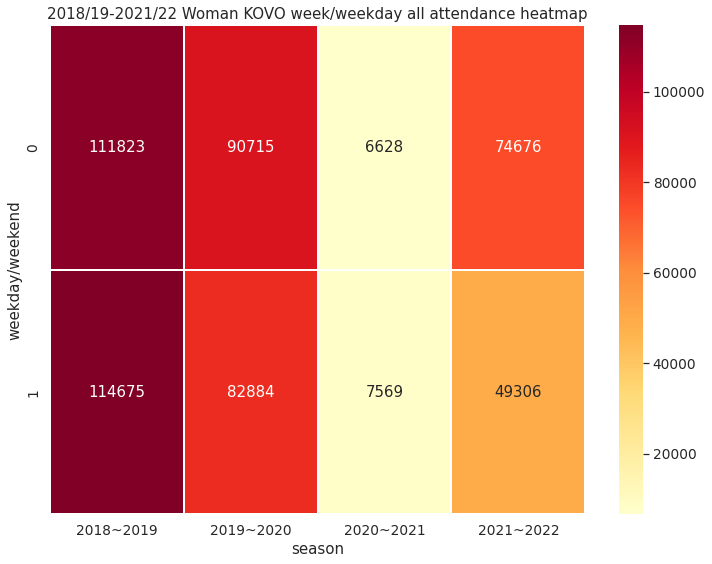

In [115]:
plt.rc('font', family='NanumBarunGothic')
plt.rcParams["figure.figsize"]=(12,9)
sns.set(font_scale=1.25)
sns.heatmap(data=Womankovo_pivot_day,cmap="YlOrRd", annot=True, fmt="d", linewidths=1)
plt.title("2018/19-2021/22 Woman KOVO week/weekday all attendance heatmap")

plt.xlabel('season',fontsize=15)
plt.ylabel('weekday/weekend',fontsize=15)

In [116]:
#여자프로농구
wkbl_pivot_day=pd.pivot_table(WKBL,index=['is_weekend'],columns='SEASON',values='ATTENDANCE',aggfunc="sum",fill_value=0)
wkbl_pivot_day

SEASON,2018~2019,2019~2020,2020~2021,2021-2022
is_weekend,,,,
0,67251,53766,0,27863
1,41971,31367,0,15773


Text(80.5, 0.5, 'weekday/weekend')

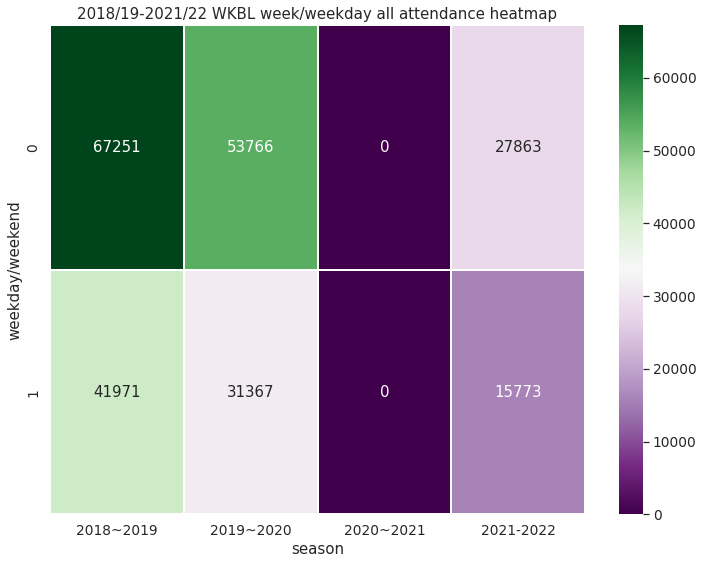

In [117]:
plt.rc('font', family='NanumBarunGothic')
plt.rcParams["figure.figsize"]=(12,9)
sns.set(font_scale=1.25)
sns.heatmap(data=wkbl_pivot_day,cmap="PRGn", annot=True, fmt="d", linewidths=1)
plt.title("2018/19-2021/22 WKBL week/weekday all attendance heatmap")

plt.xlabel('season',fontsize=15)
plt.ylabel('weekday/weekend',fontsize=15)

In [118]:
#남자프로배구
mankovo_pivot_day=pd.pivot_table(MAN_KOVO,index=['is_weekend'],columns='SEASON',values='ATTENDANCE',aggfunc="sum",fill_value=0)
mankovo_pivot_day

SEASON,2018-2019,2019-2020,2020-2021,2021-2022
is_weekend,,,,
0,184877,124338,5484,39722
1,122524,95122,4548,31954


Text(80.5, 0.5, 'weekday/weekend')

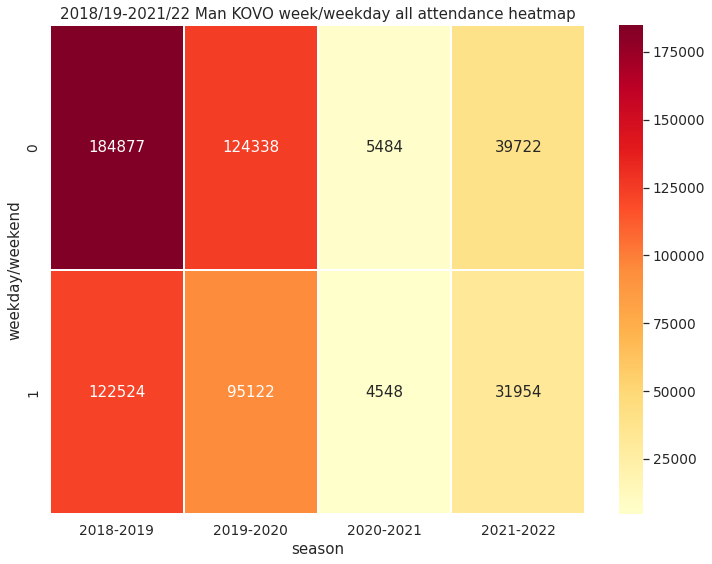

In [119]:
plt.rc('font', family='NanumBarunGothic')
plt.rcParams["figure.figsize"]=(12,9)
sns.set(font_scale=1.25)
sns.heatmap(data=mankovo_pivot_day,cmap="YlOrRd", annot=True, fmt="d", linewidths=1)
plt.title("2018/19-2021/22 Man KOVO week/weekday all attendance heatmap")

plt.xlabel('season',fontsize=15)
plt.ylabel('weekday/weekend',fontsize=15)

**관중 입장 상관관계**

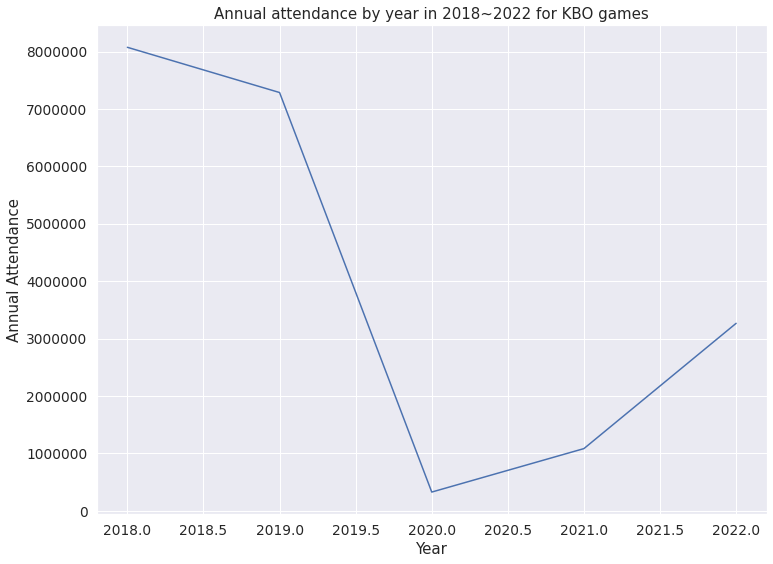

In [120]:
#관중 상관관계 선분석(프로야구)
grouped_year = pd.DataFrame(KBO.groupby('year').sum()).astype(int)

grouped_year['ATTENDANCE'] = grouped_year['ATTENDANCE'].astype(int)

plt.plot(grouped_year['ATTENDANCE'])
plt.xlabel('Year')
plt.ylabel('Annual Attendance')
plt.title('Annual attendance by year in 2018~2022 for KBO games')

plt.ticklabel_format(style='plain')


plt.show()

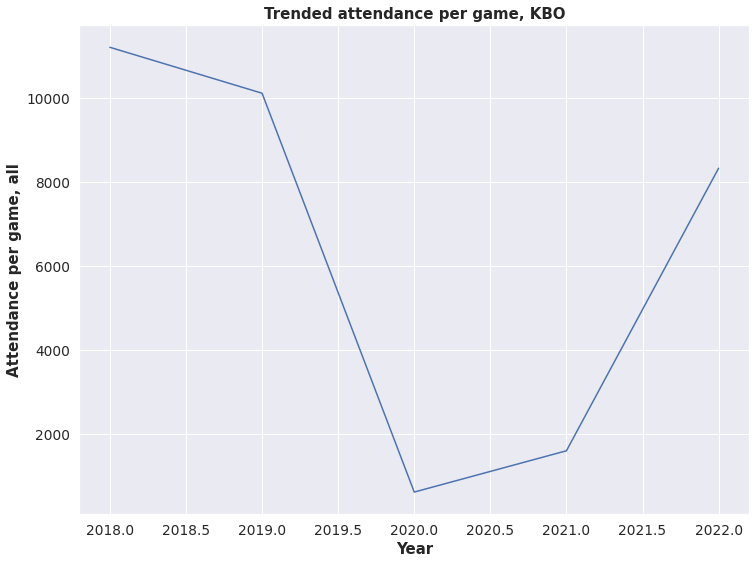

In [121]:
#경기당 관중 비율

grouped_year['attendance_per_game'] = grouped_year['ATTENDANCE'] / grouped_year['game'] #그룹화

plt.plot(grouped_year['attendance_per_game'])

plt.xlabel('Year',fontweight='bold')
plt.ylabel('Attendance per game, all',fontweight='bold')
plt.title('Trended attendance per game, KBO',fontweight='bold')
plt.ylim()

plt.show()

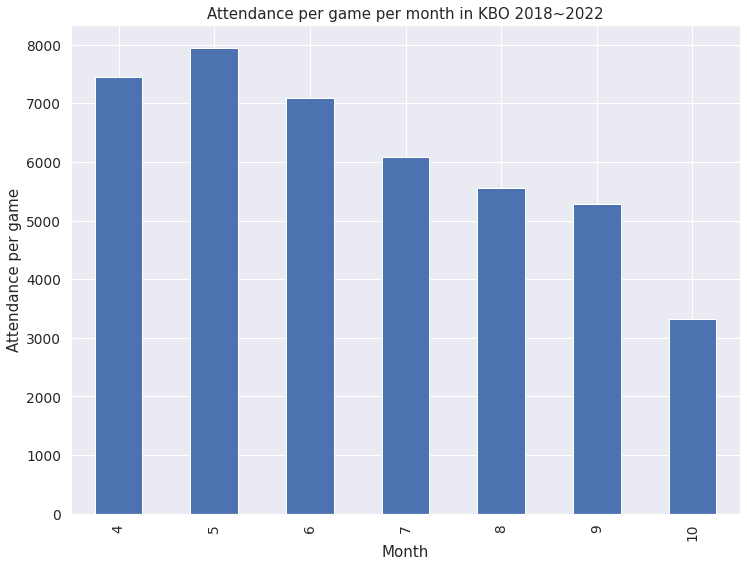

In [122]:
#월별 평균 관중입장

grouped_month = KBO.groupby(by=KBO.month).sum()
grouped_month = grouped_month[grouped_month.index != 3] # Exclude March because it's a smaller sample size
attendance_per_month = grouped_month['ATTENDANCE'] / grouped_month['game']

attendance_per_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Attendance per game')
plt.title('Attendance per game per month in KBO 2018~2022')

plt.show()

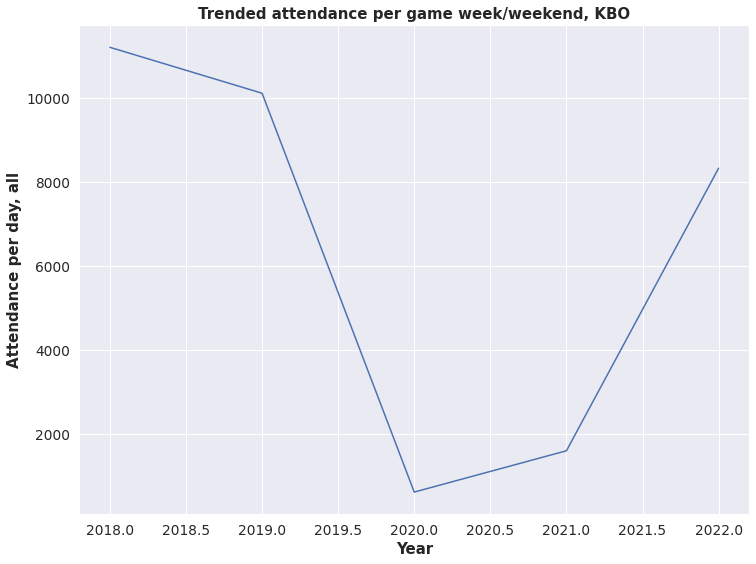

In [123]:
grouped_year['attendance_per_weekday/end'] = grouped_year['ATTENDANCE'] / grouped_year['is_weekend'] #그룹화

plt.plot(grouped_year['attendance_per_game'])

plt.xlabel('Year',fontweight='bold')
plt.ylabel('Attendance per day, all',fontweight='bold')
plt.title('Trended attendance per game week/weekend, KBO',fontweight='bold')
plt.ylim()

plt.show()

# 경기당 평균관중과 주말/평일 구분 평균관중 상관관계

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


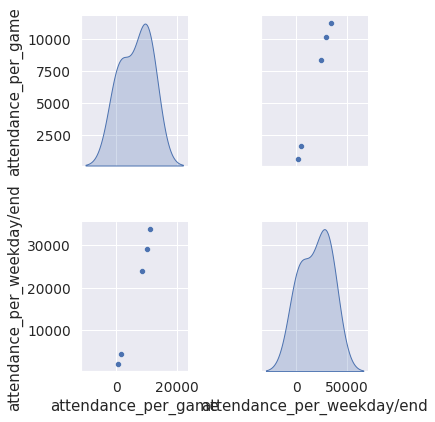

In [124]:
corr_columns = ['attendance_per_game','attendance_per_weekday/end']

sns.pairplot(grouped_year[corr_columns], diag_kind = 'kde',size=3)

plt.show()

In [125]:
# 연, 월로 된 그룹화
df_m_y = pd.DataFrame(KBO.groupby(by=[KBO.year, KBO.month]).sum())

In [126]:
df_m_y['attendance_per_game'] = df_m_y['ATTENDANCE'] / df_m_y['game']
df_m_y['attendance_per_weekday/end']=  df_m_y['ATTENDANCE'] / df_m_y['is_weekend']


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


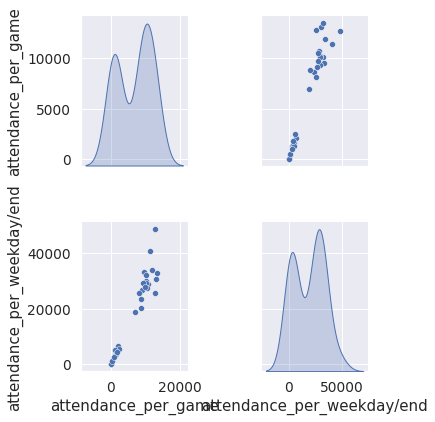

In [127]:
sns.pairplot(df_m_y[corr_columns], diag_kind = 'kde',size=3)

plt.show()

# 팀별 홈경기 평균관중 분석

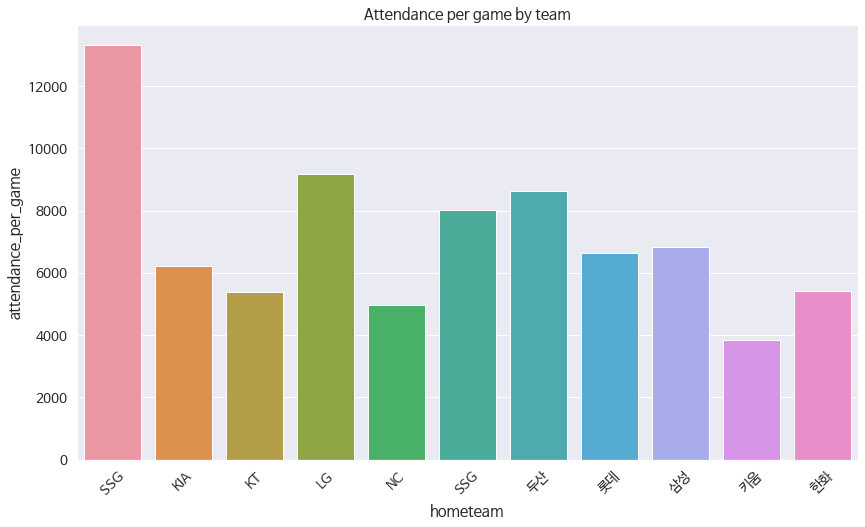

In [128]:
#팀당 홈경기 기준 평균관중 분석

## Create a dataframe grouped by team and see how average attendance per game changes per team
plt.rc('font', family='NanumBarunGothic') 
df_teams = pd.DataFrame(KBO[['hometeam','ATTENDANCE','game']].groupby(by='hometeam').sum())
df_teams['attendance_per_game'] = df_teams['ATTENDANCE'] / df_teams['game'] 

fig = plt.figure(figsize=(14, 8))

ax= sns.barplot(x=df_teams.index, y='attendance_per_game', data=df_teams)

plt.xticks(rotation=45)
plt.title('Attendance per game by team')

plt.show()

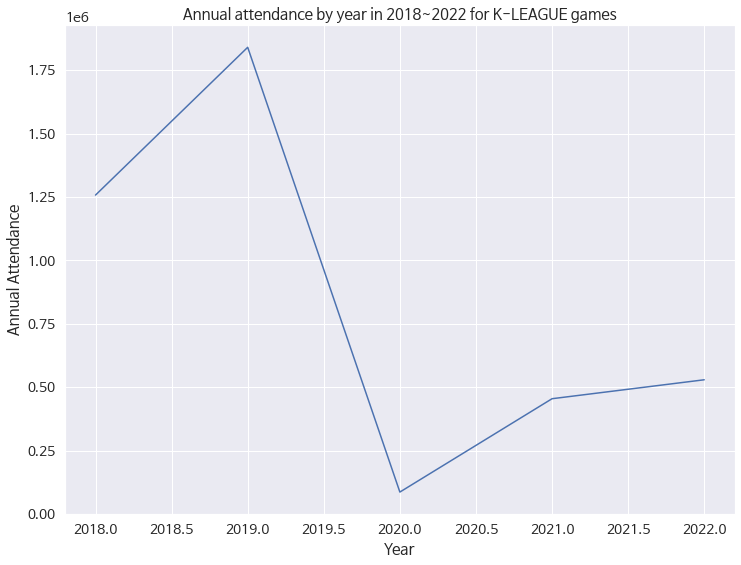

In [129]:
#프로축구 2018~2022 관중 상관관계

grouped_year = pd.DataFrame(KLEAGUE.groupby('year').sum())

grouped_year['ATTENDANCE'] = grouped_year['ATTENDANCE'].astype(int)

plt.plot(grouped_year['ATTENDANCE'])
plt.xlabel('Year')
plt.ylabel('Annual Attendance')
plt.title('Annual attendance by year in 2018~2022 for K-LEAGUE games')


plt.show()

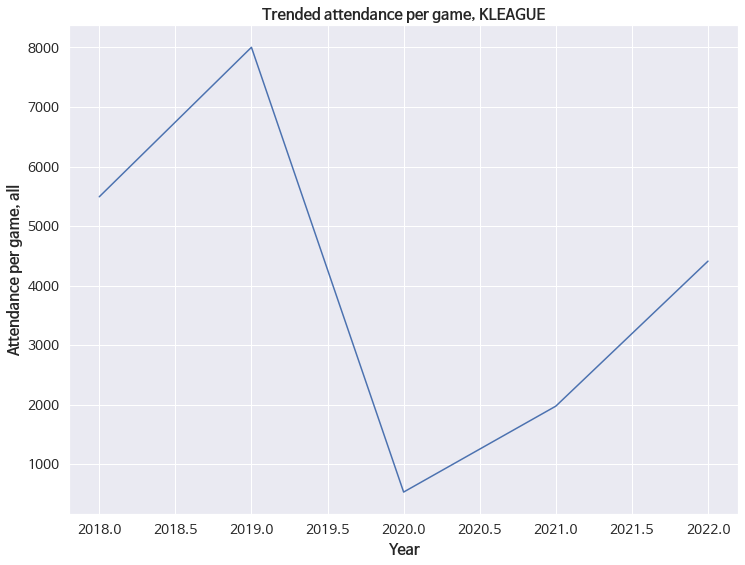

In [130]:
grouped_year['attendance_per_game'] = grouped_year['ATTENDANCE'] / grouped_year['game'] #그룹화

plt.plot(grouped_year['attendance_per_game'])

plt.xlabel('Year',fontweight='bold')
plt.ylabel('Attendance per game, all',fontweight='bold')
plt.title('Trended attendance per game, KLEAGUE',fontweight='bold')
plt.ylim()

plt.show()

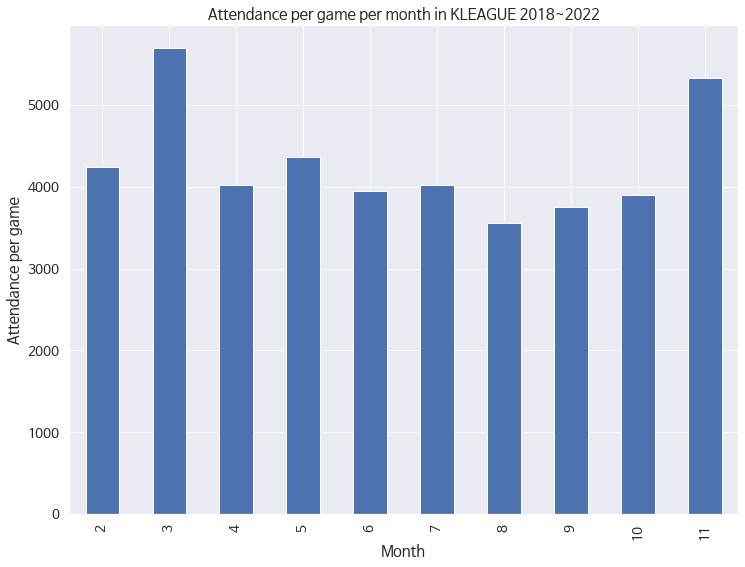

In [137]:
#월별 평균 관중인원
grouped_month = KLEAGUE.groupby(by=KLEAGUE.month).sum()
grouped_month = grouped_month[grouped_month.index != 12] # Exclude December because it's a smaller sample size
attendance_per_month = grouped_month['ATTENDANCE'] / grouped_month['game']

attendance_per_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Attendance per game')
plt.title('Attendance per game per month in KLEAGUE 2018~2022')

plt.show()

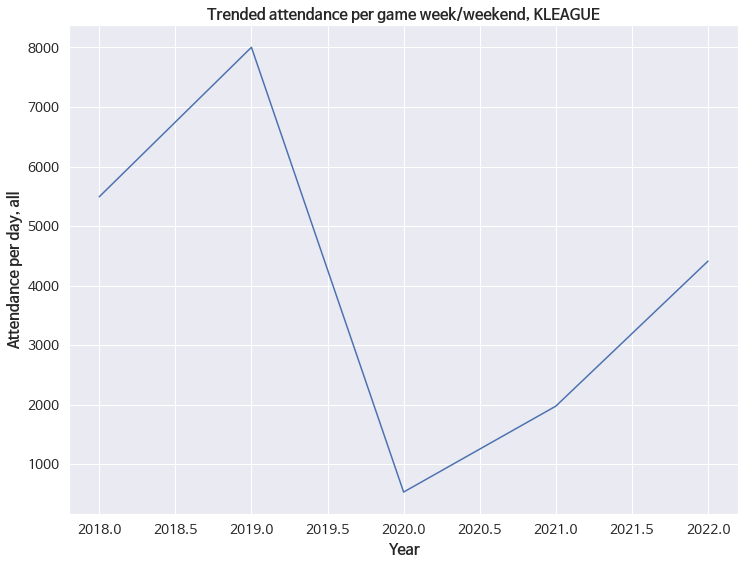

In [132]:
grouped_year['attendance_per_weekday/end'] = grouped_year['ATTENDANCE'] / grouped_year['is_weekend'] #그룹화

plt.plot(grouped_year['attendance_per_game'])

plt.xlabel('Year',fontweight='bold')
plt.ylabel('Attendance per day, all',fontweight='bold')
plt.title('Trended attendance per game week/weekend, KLEAGUE',fontweight='bold')
plt.ylim()

plt.show()